### Projeto01 - Diferentes Classes de Investimentos 
> Calculando estatisticas e returns de diferentes classes de investimentos.


In [1]:
from platform import python_version
print(python_version())

3.9.13


In [2]:
#!pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline


In [4]:
%reload_ext watermark
%watermark -a 'MichelleBouhid' --iversions

Author: MichelleBouhid

numpy     : 1.21.5
yfinance  : 0.2.31
matplotlib: 3.5.2
pandas    : 1.4.4



#### Defina os símbolos dos ativos desejados
ativos = ["TLT", "GDX", "SPY", "BTC-USD", "XLE", "BRK-A"]

#### Defina as datas de início e fim do período desejado
data_inicio = "2015-01-01"
data_fim = "2022-12-31"

#### Crie um dicionário para armazenar os DataFrames dos ativos
dados_ativos = {}

#### Itere sobre os símbolos dos ativos e obtenha os dados
for ativo in ativos:
    dados = yf.download(ativo, start=data_inicio, end=data_fim)
    dados_ativos[ativo] = dados

#### Itere novamente sobre o dicionário de DataFrames para salvar cada um em seu próprio arquivo CSV
for ativo, dados in dados_ativos.items():
    # Especifique o nome do arquivo CSV
    nome_arquivo = f"{ativo}_historico_precos.csv"
    
    # Salve o DataFrame como um arquivo CSV
    dados.to_csv(nome_arquivo)

    # Informe que o arquivo foi salvo
    print(f"Os dados de {ativo} foram salvos em {nome_arquivo}")
    
Problema: Ele não carregou todos os tickers de uma vez, só o ultimo.
Decidi fazer um por 1 e depois concatenar os .CSV

Preciso aprender como fazer isso escolhendo corretamente os nomes dos df


In [5]:
# Importando os dados historicos 
# Não estou conseguindo importar todos juntos... ativos = ['SPY',"TLT", "GDX","BTC-USD", "XLE","BRK-A"]

#ativos = ['SPY']

#data_inicio = '2015-01-01'
#data_fim = '2022-12-31'

In [6]:
#dados_ativos = {}

In [7]:
#for ativo in ativos:
    #dados = yf.download(ativo, start=data_inicio, end=data_fim)
    #dados_ativos[ativo]=dados

In [8]:
#for ativo, dados in dados_ativos.items():
    #historico_dados = f"{ativo}_historico_precos.csv"

In [9]:
#dados.to_csv(historico_dados)
#print(f"Os dados de {ativo} foram salvos em {historico_dados}")

In [10]:
#dados.head()

In [11]:
#dados.tail()

> Organizando dados SPY

In [12]:
arquivo_csv_spy = Path('dados/SPY_historico.csv')

In [13]:
df_spy_history = pd.read_csv(arquivo_csv_spy,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)

In [14]:
df_spy_history.sort_index(ascending = True, inplace = True)

In [15]:
df_spy_history.shape

(2014, 6)

In [16]:
df_spy_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515533,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345764,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722427,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849838,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917068,147217800


In [17]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_spy_history.drop(colunas_removidas, axis=1, inplace = True)

In [18]:
df_spy_daily_returns = df_spy_history.pct_change()
df_spy_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.018060
2015-01-06,-0.009419
2015-01-07,0.012461
2015-01-08,0.017745


In [19]:
print(df_spy_daily_returns.isnull().sum())

Close    1
dtype: int64


In [20]:
df_spy_daily_returns.dropna(inplace = True)
print(df_spy_daily_returns.isnull().sum())

Close    0
dtype: int64


In [21]:
df_spy_daily_returns.rename(columns={'Close':'SPY'}, inplace=True)
df_spy_daily_returns.head()

,SPY
Date,
2015-01-05,-0.018060
2015-01-06,-0.009419
2015-01-07,0.012461
2015-01-08,0.017745
2015-01-09,-0.008014


> Organizando dados BRK-A

In [22]:
# Arquivo csv

arquivo_csv_brka = Path('dados/BRK-A_historico.csv')

In [23]:
df_brka_history = pd.read_csv(arquivo_csv_brka,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)

In [24]:
df_brka_history.sort_index(ascending = True, inplace = True)

In [25]:
df_brka_history.shape

(2014, 6)

In [26]:
df_brka_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,227230.0,227470.0,222735.0,223600.0,223600.0,300
2015-01-05,223595.0,223595.0,220000.0,220980.0,220980.0,500
2015-01-06,221110.0,222870.0,219266.0,220450.0,220450.0,400
2015-01-07,222500.0,223536.0,220000.0,223480.0,223480.0,400
2015-01-08,226124.0,226949.0,224000.0,226680.0,226680.0,600


In [27]:
df_brka_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [28]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_brka_history.drop(colunas_removidas, axis=1, inplace = True)

In [29]:
df_brka_daily_returns = df_brka_history.pct_change()
df_brka_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.011717
2015-01-06,-0.002398
2015-01-07,0.013745
2015-01-08,0.014319


In [30]:
print(df_brka_daily_returns.isnull().sum())

Close    1
dtype: int64


In [31]:
df_brka_daily_returns.dropna(inplace = True)
print(df_brka_daily_returns.isnull().sum())

Close    0
dtype: int64


In [32]:
df_brka_daily_returns.rename(columns={'Close':'BRKA'}, inplace=True)

In [33]:
df_brka_daily_returns.head()

,BRKA
Date,
2015-01-05,-0.011717
2015-01-06,-0.002398
2015-01-07,0.013745
2015-01-08,0.014319
2015-01-09,-0.008845


> Organizando dados BTC-USD

In [34]:
arquivo_csv_btcusd = Path('dados/BTC-USD_historico.csv')
df_btcusd_history = pd.read_csv(arquivo_csv_btcusd,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)
df_btcusd_history.sort_index(ascending = True, inplace = True)

In [35]:
df_btcusd_history.shape

(2921, 6)

In [36]:
df_btcusd_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [37]:
df_btcusd_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [38]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_btcusd_history.drop(colunas_removidas, axis=1, inplace = True)

In [39]:
df_btcusd_daily_returns = df_btcusd_history.pct_change()
df_btcusd_daily_returns.head()

,Close
Date,
2015-01-01,NaN
2015-01-02,0.002492
2015-01-03,-0.107767
2015-01-04,-0.060079
2015-01-05,0.038907


In [40]:
df_btcusd_daily_returns.dropna(inplace = True)
print(df_btcusd_daily_returns.isnull().sum())

Close    0
dtype: int64


In [41]:
df_btcusd_daily_returns.rename(columns={'Close':'BTC-USD'}, inplace=True)

In [42]:
df_btcusd_daily_returns.head()

,BTC-USD
Date,
2015-01-02,0.002492
2015-01-03,-0.107767
2015-01-04,-0.060079
2015-01-05,0.038907
2015-01-06,0.042682


> Organizando dados GDX

In [43]:
arquivo_csv_gdx = Path('dados/gdx_historico.csv')
df_gdx_history = pd.read_csv(arquivo_csv_gdx,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)
df_gdx_history.sort_index(ascending = True, inplace = True)

In [44]:
df_gdx_history.shape

(2014, 6)

In [45]:
df_gdx_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,18.070000,18.950001,17.950001,18.940001,17.639563,47287400
2015-01-05,19.059999,19.469999,18.760000,19.440001,18.105230,46021100
2015-01-06,19.629999,20.690001,19.540001,20.469999,19.064510,76091200
2015-01-07,20.010000,20.670000,19.820000,20.090000,18.710602,45809700
2015-01-08,20.230000,20.570000,19.610001,19.790001,18.431202,46813900


In [46]:
df_gdx_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [47]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_gdx_history.drop(colunas_removidas, axis=1, inplace = True)

In [48]:
df_gdx_daily_returns = df_gdx_history.pct_change()
df_gdx_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,0.026399
2015-01-06,0.052983
2015-01-07,-0.018564
2015-01-08,-0.014933


In [49]:
df_gdx_daily_returns.rename(columns={'Close':'GDX'}, inplace=True)

In [50]:
df_gdx_daily_returns.dropna(inplace = True)
print(df_gdx_daily_returns.isnull().sum())
df_gdx_daily_returns.head()

GDX    0
dtype: int64


,GDX
Date,
2015-01-05,0.026399
2015-01-06,0.052983
2015-01-07,-0.018564
2015-01-08,-0.014933
2015-01-09,0.046488


> Organizando dados TFLO

Problema: coluna VOLUME, devo dropar? não interfere na minha analise essa informação
só deu problema no ETF TFLO.

In [51]:
arquivo_csv_tflo = Path('dados/tflo_historico.csv')
df_tflo_history = pd.read_csv(arquivo_csv_tflo,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)
df_tflo_history.sort_index(ascending = True, inplace = True)

In [52]:
df_tflo_history.shape

(2014, 6)

In [53]:
df_tflo_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,50.009998,50.090000,50.009998,50.090000,44.869663,2000
2015-01-05,50.090000,50.090000,50.090000,50.090000,44.869663,0
2015-01-06,50.090000,50.090000,50.090000,50.090000,44.869663,0
2015-01-07,49.990002,49.990002,49.990002,49.990002,44.780083,0
2015-01-08,50.060001,50.060001,50.060001,50.060001,44.842777,700


In [54]:
df_tflo_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [55]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_tflo_history.drop(colunas_removidas, axis=1, inplace = True)

In [56]:
df_tflo_daily_returns = df_tflo_history.pct_change()
df_tflo_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,0.000000
2015-01-06,0.000000
2015-01-07,-0.001996
2015-01-08,0.001400


In [57]:
df_tflo_daily_returns.shape

(2014, 1)

In [58]:
df_tflo_daily_returns.dtypes

Close    float64
dtype: object

In [59]:
print(df_tflo_daily_returns.isnull().sum())

Close    1
dtype: int64


In [60]:
df_tflo_daily_returns.rename(columns={'Close':'TFLO'}, inplace=True)

In [61]:
df_tflo_daily_returns.dropna(inplace = True)
print(df_tflo_daily_returns.isnull().sum())
df_tflo_daily_returns.head()

TFLO    0
dtype: int64


,TFLO
Date,
2015-01-05,0.000000
2015-01-06,0.000000
2015-01-07,-0.001996
2015-01-08,0.001400
2015-01-09,0.000000


> Organizando dados TLT

In [62]:
arquivo_csv_tlt = Path('dados/tlt_historico.csv')
df_tlt_history = pd.read_csv(arquivo_csv_tlt,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)
df_tlt_history.sort_index(ascending = True, inplace = True)

In [63]:
df_tlt_history.shape

(2014, 6)

In [64]:
df_tlt_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,126.290001,127.660004,126.150002,127.320000,103.702698,9432000
2015-01-05,128.009995,129.630005,127.959999,129.320007,105.331665,9789500
2015-01-06,130.699997,132.490005,130.190002,131.649994,107.229454,18331300
2015-01-07,130.699997,131.970001,130.169998,131.389999,107.017685,9762900
2015-01-08,130.360001,130.369995,129.419998,129.649994,105.600456,8055300


In [65]:
df_tlt_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [66]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_tlt_history.drop(colunas_removidas, axis=1, inplace = True)

In [67]:
df_tlt_daily_returns = df_tlt_history.pct_change()
df_tlt_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,0.015709
2015-01-06,0.018017
2015-01-07,-0.001975
2015-01-08,-0.013243


In [68]:
df_tlt_daily_returns.rename(columns={'Close':'TLT'}, inplace=True)

In [69]:
df_tlt_daily_returns.dropna(inplace = True)
print(df_tlt_daily_returns.isnull().sum())
df_tlt_daily_returns.head()

TLT    0
dtype: int64


,TLT
Date,
2015-01-05,0.015709
2015-01-06,0.018017
2015-01-07,-0.001975
2015-01-08,-0.013243
2015-01-09,0.010953


> Organizando dados XLE

In [70]:
arquivo_csv_xle = Path('dados/xle_historico.csv')
df_xle_history = pd.read_csv(arquivo_csv_xle,
                             index_col = 'Date',
                             parse_dates = True,
                             infer_datetime_format = True)
df_xle_history.sort_index(ascending = True, inplace = True)

In [71]:
df_xle_history.shape
df_xle_history.head()
df_xle_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [72]:
colunas_removidas = ['Volume','Adj Close','Low','High','Open']
df_xle_history.drop(colunas_removidas, axis=1, inplace = True)

In [73]:
df_xle_daily_returns = df_xle_history.pct_change()
df_xle_daily_returns.head()

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.041368
2015-01-06,-0.014690
2015-01-07,0.002130
2015-01-08,0.022450


In [74]:
df_xle_daily_returns.rename(columns={'Close':'XLE'}, inplace=True)

In [75]:
df_xle_daily_returns.dropna(inplace = True)
print(df_xle_daily_returns.isnull().sum())
df_xle_daily_returns.head()

XLE    0
dtype: int64


,XLE
Date,
2015-01-05,-0.041368
2015-01-06,-0.014690
2015-01-07,0.002130
2015-01-08,0.022450
2015-01-09,-0.007925


### Combinando Dataframes

In [76]:
df_spy_daily_returns.shape

(2013, 1)

In [77]:
df_brka_daily_returns.shape

(2013, 1)

In [78]:
df_btcusd_daily_returns.shape

(2920, 1)

In [79]:
df_gdx_daily_returns.shape

(2013, 1)

In [80]:
df_tflo_daily_returns.shape

(2013, 1)

In [81]:
df_tlt_daily_returns.shape

(2013, 1)

In [82]:
df_xle_daily_returns.shape

(2013, 1)

In [83]:
# Concatenando Dataframes

df_daily_returns = pd.concat([df_spy_daily_returns, df_brka_daily_returns, df_btcusd_daily_returns, df_gdx_daily_returns, df_tlt_daily_returns, df_xle_daily_returns],
                            axis = 'columns',
                            join = 'inner')


In [84]:
df_daily_returns.sort_index(inplace = True)

In [85]:
# Perdi info por causa da coluna volume do TFLO - resolvi dropar as colunas que nao ia usar
# Preciso pegar somente a 'coluna Close" de cada ativo e salvar em um .CSV
df_daily_returns.shape

(2013, 6)

In [86]:
df_daily_returns.head()

,SPY,BRKA,BTC-USD,GDX,TLT,XLE
Date,,,,,,
2015-01-05,-0.018060,-0.011717,0.038907,0.026399,0.015709,-0.041368
2015-01-06,-0.009419,-0.002398,0.042682,0.052983,0.018017,-0.014690
2015-01-07,0.012461,0.013745,0.028471,-0.018564,-0.001975,0.002130
2015-01-08,0.017745,0.014319,-0.037331,-0.014933,-0.013243,0.022450
2015-01-09,-0.008014,-0.008845,0.024913,0.046488,0.010953,-0.007925


### Análise dos Ativos

#### Performance

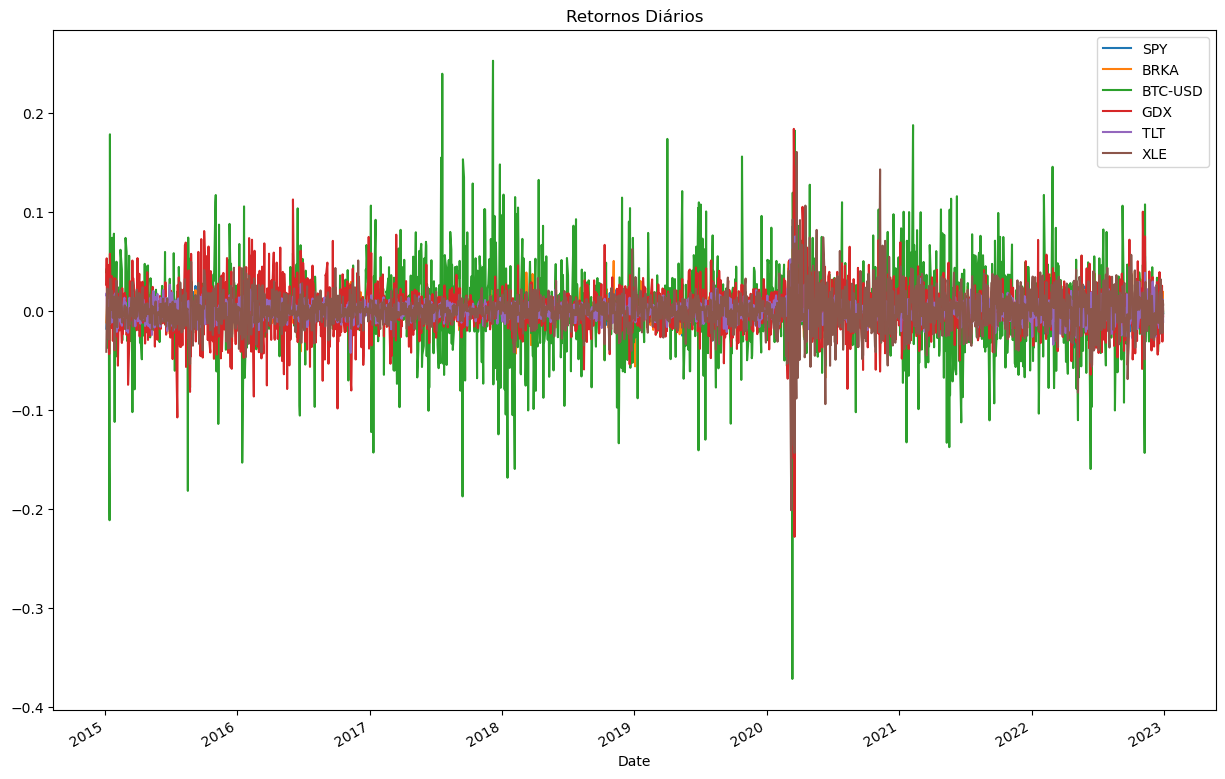

In [87]:
# Retornos Diários
df_daily_returns.plot(figsize = (15,10), title ='Retornos Diários')
plt.savefig('RetornosDiarios.pdf')

<AxesSubplot:title={'center':'Retorno Acumulado Simples'}, xlabel='Date'>

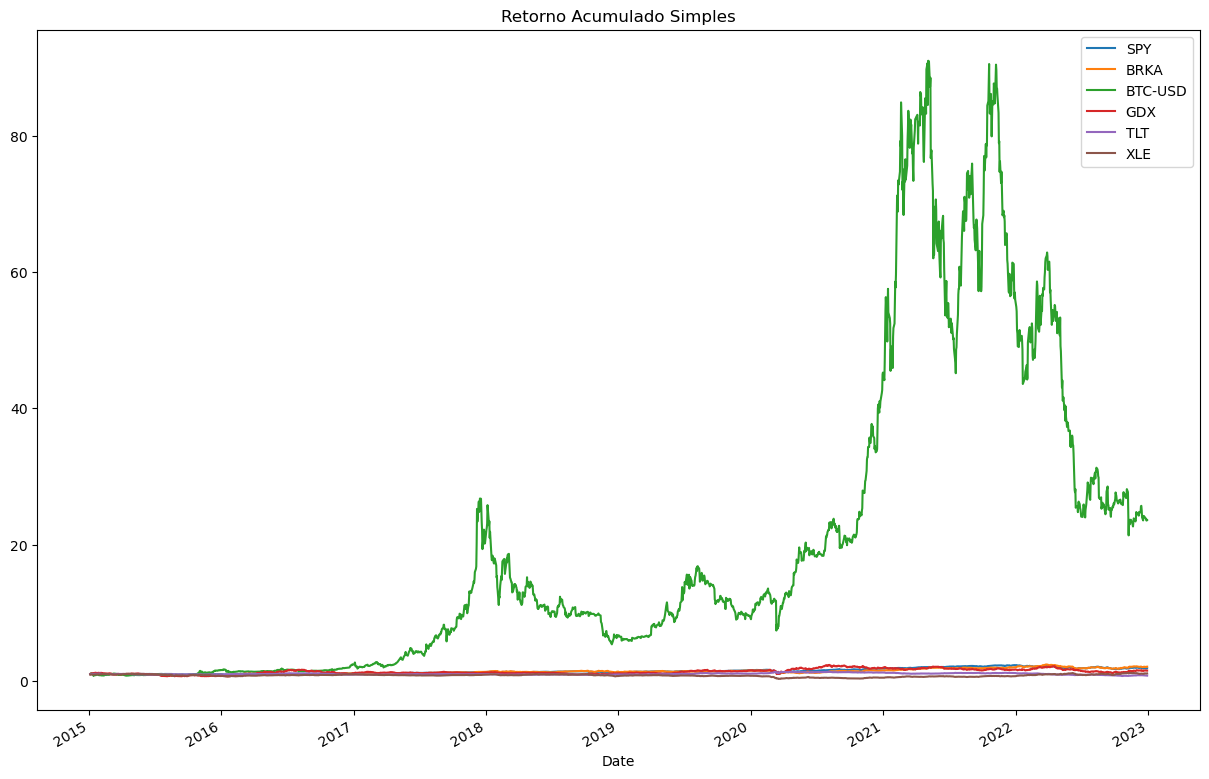

In [88]:
# Retornos Acumulados
df_cum_returns = df_daily_returns.cumsum(axis=0, skipna = True)
df_cum_returns = (1 + df_daily_returns).cumprod()
df_cum_returns.plot(figsize = (15,10), title ='Retorno Acumulado Simples')

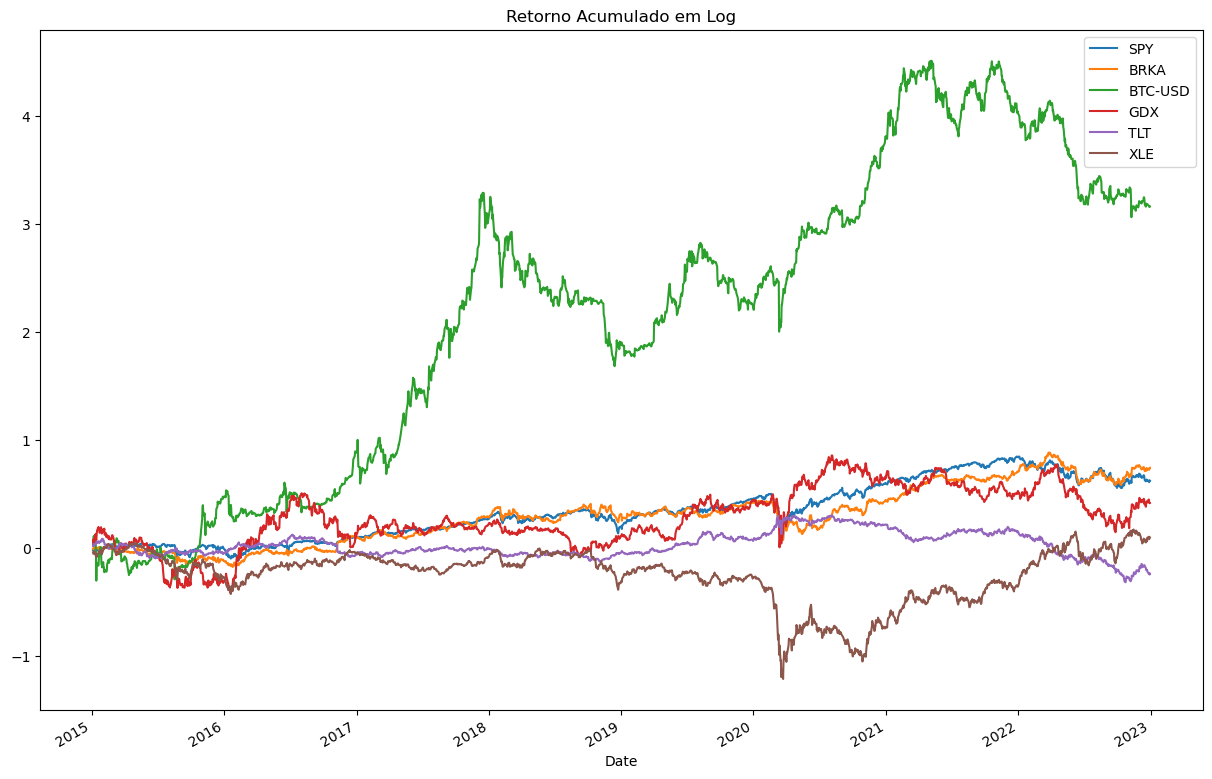

In [113]:
# Retornos em escala Log

df_cum_returns_log = np.log(1 + df_daily_returns).cumsum()
df_cum_returns_log.plot(figsize=(15, 10), title='Retorno Acumulado em Log')
#plt.savefig("GraficologReturns") # se não colocar extensao ele usa .PNG
plt.show()

### Analise de Risco

In [90]:
df_daily_returns.columns

Index(['SPY', 'BRKA', 'BTC-USD', 'GDX', 'TLT', 'XLE'], dtype='object')

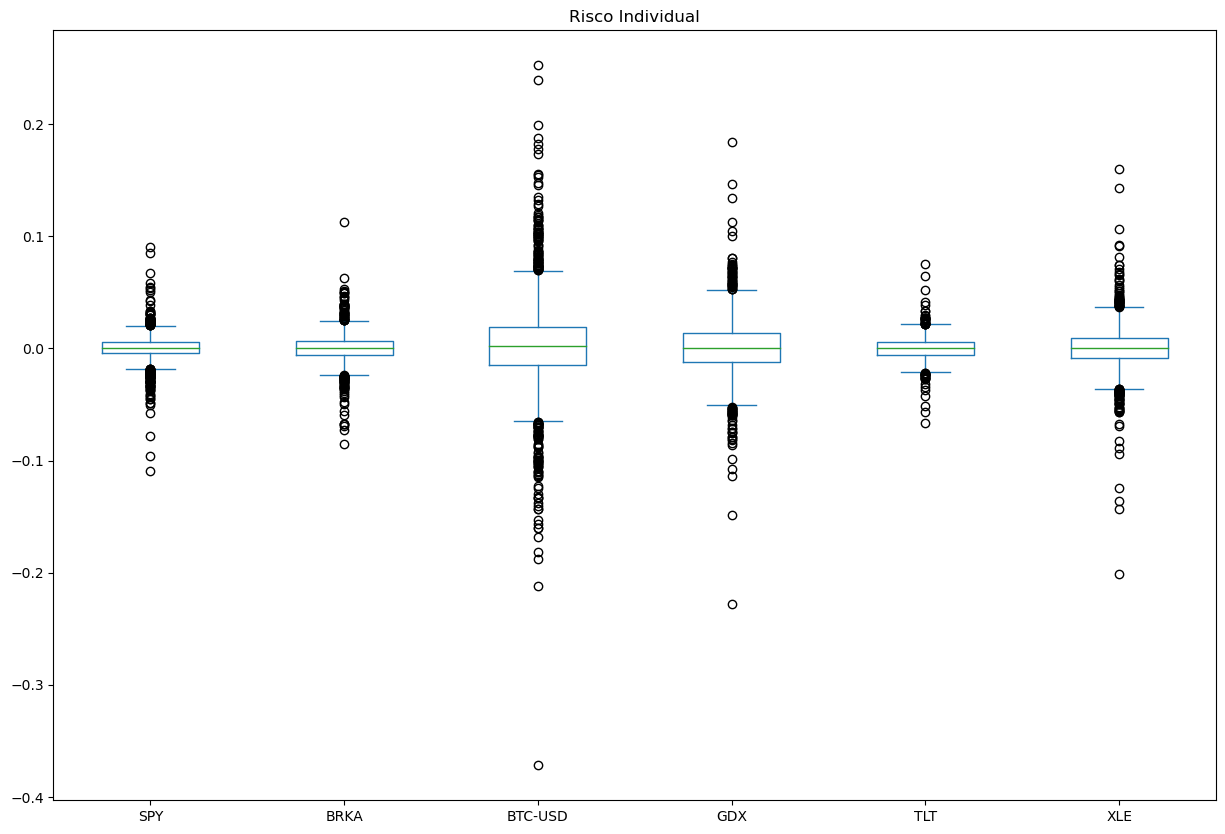

In [101]:
# Box Plot - Visualmente o risco
df_daily_returns.plot(kind = 'box', figsize = (15,10), title='Risco Individual')
#plt.savefig("boxplotRiscoIndividual.pdf")

In [92]:
# Desvio Padrão diário de cada ativo

df_daily_returns_std = pd.DataFrame(df_daily_returns.std())
df_daily_returns_std.columns = ['STD']
df_daily_returns_std

,STD
SPY,0.011781
BRKA,0.012384
BTC-USD,0.041580
GDX,0.024997
TLT,0.009474
XLE,0.020059


In [93]:
# Quais ativos analisados são mais arriscados que SPY? (benchmark)
risco = df_daily_returns_std.loc[df_daily_returns_std['STD'] > df_daily_returns_std.loc ['SPY', 'STD']]
risco

,STD
BRKA,0.012384
BTC-USD,0.041580
GDX,0.024997
XLE,0.020059


In [94]:
# Desvio padrao anualizado por 252. Ano comercial 
#  não sei se faz sentido pelo foco ser o BTC 7/24
# porque sumiu o XLE? hahah esqueci que o head so mostra 5!
annualized_df_daily_returns_std = df_daily_returns_std *np.sqrt(252)
annualized_df_daily_returns_std.head(10)

,STD
SPY,0.187023
BRKA,0.196591
BTC-USD,0.660056
GDX,0.396820
TLT,0.150395
XLE,0.318429


### Rolling Statistics

#### Grafico do desvio padrão, usando uma janela de 21 dias de negociação.

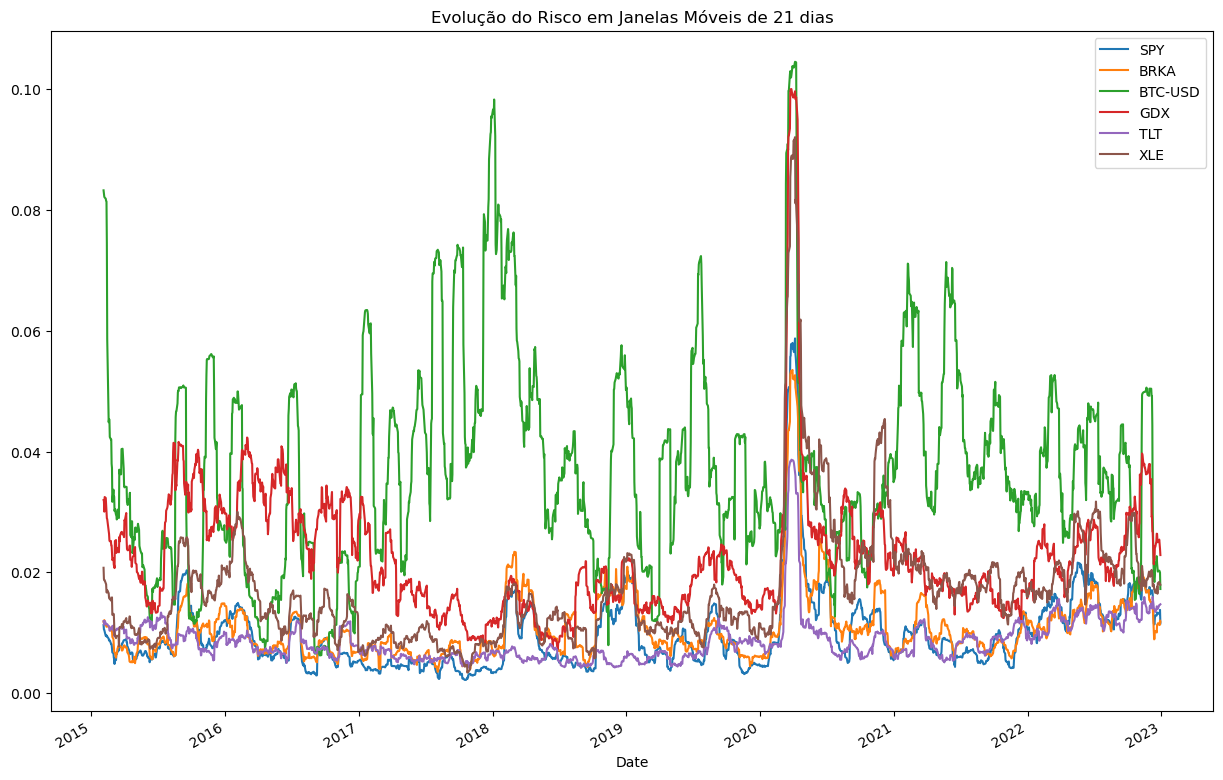

In [112]:
df_daily_returns.rolling(window = 21).std().plot(figsize = (15,10), title='Evolução do Risco em Janelas Móveis de 21 dias')
#plt.savefig('GraficoRiscoJM21d')

In [96]:
# Tabela de Correlação
correlation = df_daily_returns.corr()
correlation

,SPY,BRKA,BTC-USD,GDX,TLT,XLE
SPY,1.000000,0.788503,0.218113,0.165157,-0.274482,0.654985
BRKA,0.788503,1.000000,0.143011,0.097161,-0.279026,0.626681
BTC-USD,0.218113,0.143011,1.000000,0.138472,-0.008187,0.139017
GDX,0.165157,0.097161,0.138472,1.000000,0.222389,0.202166
TLT,-0.274482,-0.279026,-0.008187,0.222389,1.000000,-0.292825
XLE,0.654985,0.626681,0.139017,0.202166,-0.292825,1.000000


Correlação = -1 - Forte Correlação Negativa

Correlação = 0 => Não há Correlação

Correlação = 1 - Forte Correlação Positiva

<AxesSubplot:title={'center':'Beta BTC-USD x SPY (JM21d)'}, xlabel='Date'>

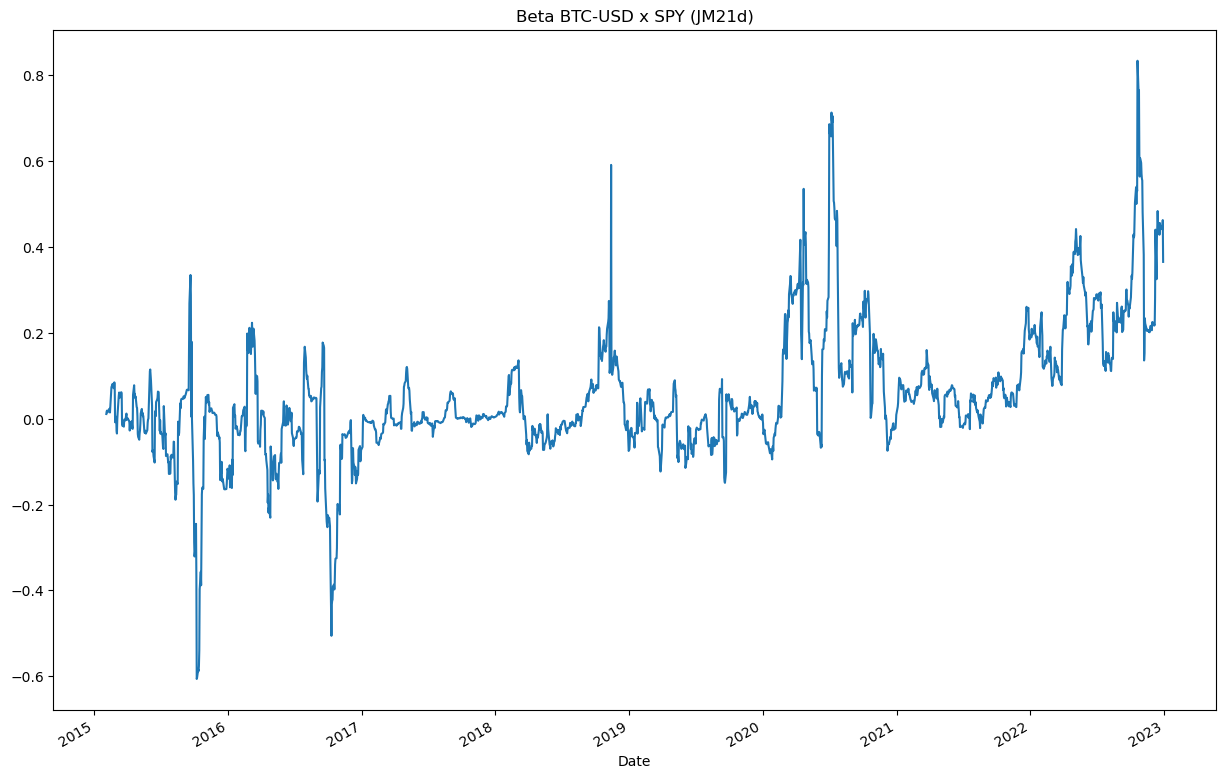

In [107]:
# Calcula o Beta para um unico ativo comparando com SPY
covariance_btcusd = df_daily_returns['BTC-USD'].rolling(window=21).cov(df_daily_returns['SPY'])
variance_btcusd = df_daily_returns['BTC-USD'].rolling(window=21).var()
beta_btcusd = covariance_btcusd / variance_btcusd
beta_btcusd.plot(kind = 'line',figsize = (15,10), title = 'Beta BTC-USD x SPY (JM21d)')

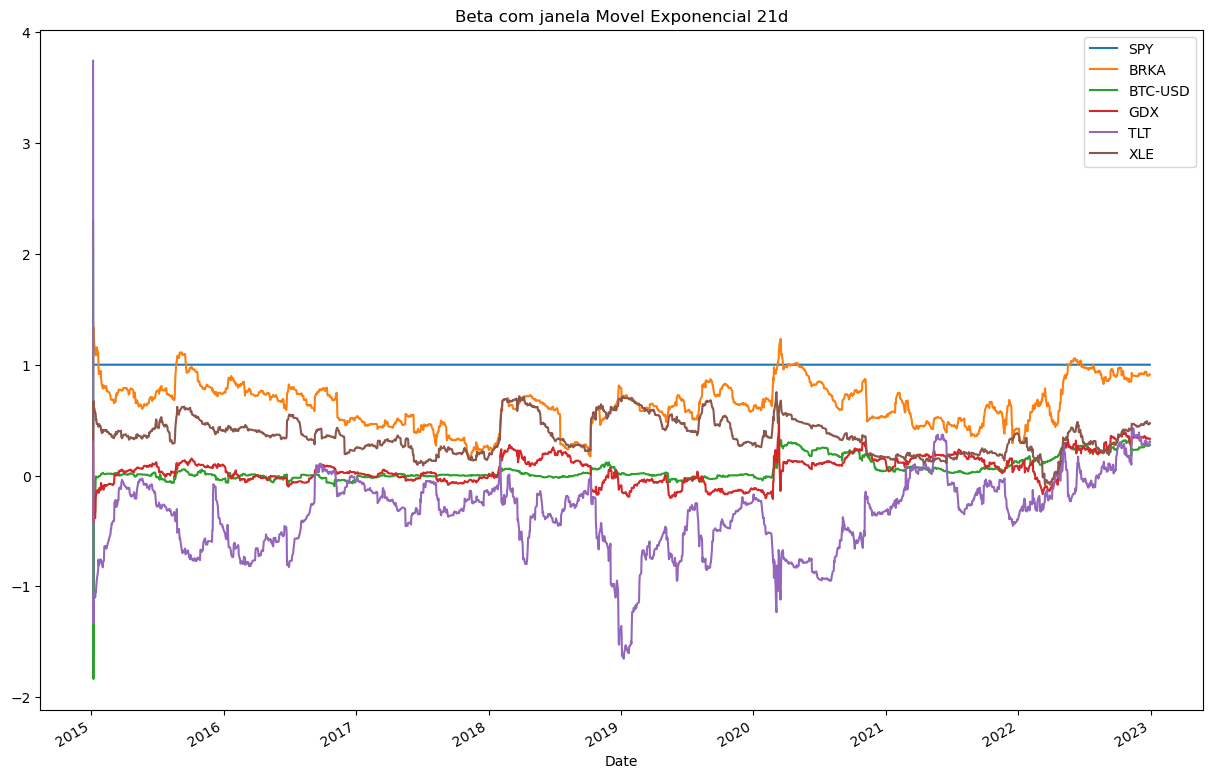

In [108]:
# Calcula Beta, em uma janela movel usando a media exponencial ponderada
covariance_daily_exponencial = df_daily_returns.ewm(halflife = 21).cov(df_daily_returns['SPY'])
variance_daily_exponencial = df_daily_returns.ewm(halflife = 21).var()
beta_daily_exponencial = covariance_daily_exponencial/variance_daily_exponencial
beta_daily_exponencial.plot(kind = 'line', figsize = (15,10), title = 'Beta com janela Movel Exponencial 21d')
#plt.savefig('graficoBetaJM21d')

Beta de 0: Indica que o ativo não tem correlação com o mercado, é considerado um ativo "livre de risco" nesse contexto.
Beta entre 0 e 1: O ativo é menos volátil do que o mercado.
Beta igual a 1: O ativo tem a mesma volatilidade do mercado.
Beta acima de 1: O ativo é mais volátil do que o mercado.

O método ewm (Exponential Moving Window) é uma função no pandas que permite calcular uma média ponderada exponencialmente de uma série temporal. Ele é frequentemente usado em finanças para suavizar dados e reduzir o impacto de flutuações de curto prazo, destacando tendências de longo prazo.

Os investidores usam o Beta para avaliar como um ativo reage às mudanças no mercado e como ele pode contribuir para a diversificação de uma carteira de investimentos. Um ativo com Beta baixo pode ser usado para reduzir o risco de uma carteira, enquanto um com Beta alto pode ser considerado mais arriscado e volátil. No entanto, o Beta tem suas limitações e não considera todos os aspectos do risco, como riscos específicos da empresa. Portanto, é uma ferramenta complementar na análise de investimentos.

### Sharpe Ratios

1. Usando os retornos diários, calculamos e visualizamos as taxas de Sharpe usando um gráfico de barras.
2. Determinamos se as estratégias algorítmicas superam o mercado (S&P 500) e os portfólios dos fundos de hedge.

> Quanto maior o valor do índice de Sharpe, mais atraente é o retorno ajustado ao risco.


In [99]:
# Calcula o Sharp Ratio Anualizado
sharpe_ratios = (df_daily_returns.mean()*252) / (df_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SPY        0.509966
BRKA       0.569725
BTC-USD    0.934171
GDX        0.329860
TLT       -0.129572
XLE        0.197884
dtype: float64

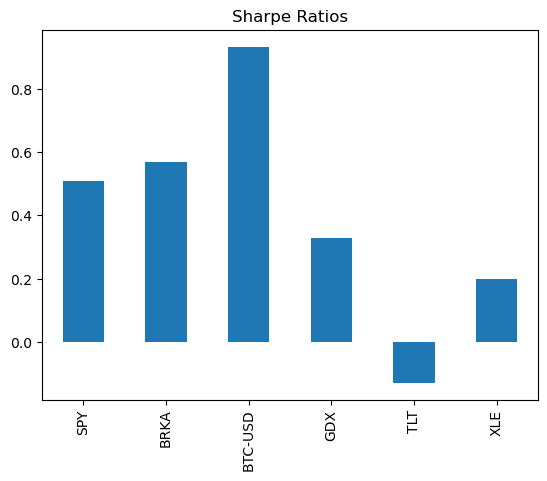

In [110]:
# Gráfico do Sharpe
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")
plt.savefig('SharpeRatios.pdf')

# FIM


GPT sobre outras métricas:

Usar o Beta e o Índice de Sharpe juntos pode ser uma abordagem robusta para avaliar o desempenho de um investimento, especialmente porque eles se concentram em aspectos diferentes da análise. Além dessas métricas, aqui estão algumas outras medidas que podem ser consideradas na análise de investimentos:

1. Alpha:
O Alpha mede o excesso de retorno de um investimento em relação ao seu Beta e ao mercado em geral. Um Alpha positivo indica um desempenho superior ao esperado, enquanto um Alpha negativo sugere um desempenho inferior.
2. Rácio de Sortino:
Similar ao Índice de Sharpe, mas se concentra apenas no risco negativo (volatilidade abaixo de um determinado limiar), proporcionando uma visão mais específica sobre a capacidade de um investimento de lidar com perdas.
3. Rácio de Treynor:
Similar ao Índice de Sharpe, mas utiliza o Beta como medida de risco. Isso destaca o retorno ajustado ao risco sistêmico.
4. Drawdowns:
Avalia a extensão das perdas em um investimento ao longo do tempo. Isso fornece insights sobre a capacidade do investimento de se recuperar de quedas significativas.
5. Rácio de Informação:
Mede o excesso de retorno em relação a um benchmark por unidade de risco. É uma medida de desempenho ajustada ao risco semelhante ao Índice de Sharpe.
6. Sharpe Ratio Modificado (M2):
Incorpora o Índice de Sharpe e o Risco de Mercado para avaliar o desempenho ajustado ao risco em relação a uma carteira de mercado.
7. Máximas Perdas (Maximum Drawdown):
Representa a maior redução percentual de um pico até uma baixa antes de um novo pico ser atingido. Isso destaca o maior declínio que um investidor teria experimentado.
8. Taxa de Crescimento Sustentável (Sustainable Growth Rate - SGR):
Relaciona o crescimento dos lucros com o pagamento de dividendos e a retenção de lucros. Pode ser útil para avaliar a sustentabilidade do crescimento da empresa.
9. Beta Ajustado ao Risco (Risk-Adjusted Beta):
Considera o risco específico do ativo em vez do risco total. Isso ajuda a identificar ativos que podem não seguir o mercado, mesmo que tenham um Beta aparentemente alto.
10. Indicadores de Análise Fundamental:
Métricas como P/E (Price-to-Earnings), P/B (Price-to-Book), ROE (Return on Equity), entre outros, podem fornecer insights sobre a saúde financeira e a avaliação de uma empresa.
Ao utilizar uma combinação dessas métricas, os investidores podem obter uma visão mais abrangente do desempenho, risco e valor de um investimento. É importante adaptar a análise ao contexto específico do investimento e considerar as metas e tolerâncias de risco do investidor.





